In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/ustudent/Documents/ML_220962404/Lab10/data.csv')

def kmeans(data, k, distance_metric='euclidean', max_iters=100):
    centroids = data.sample(k).to_numpy()
    prev_centroids = np.zeros(centroids.shape)

    sse_history = []

    for _ in range(max_iters):
        if distance_metric == 'euclidean':
            distances = np.linalg.norm(data.to_numpy()[:, None] - centroids, axis=2)
        elif distance_metric == 'manhattan':
            distances = np.abs(data.to_numpy()[:, None] - centroids).sum(axis=2)
        elif distance_metric == 'minkowski':
            distances = np.power(np.abs(data.to_numpy()[:, None] - centroids), 3).sum(axis=2) ** (1/3)
        
        clusters = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        sse = np.sum((data.to_numpy() - centroids[clusters])**2)

        sse_history.append(sse)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return clusters, centroids, sse_history



In [13]:
def plot_clusters(data, clusters, centroids, k, distance_metric):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['points'], data['assists'], c=clusters, cmap='viridis', label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering with K={k} ({distance_metric} distance)')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
def plot_sse(sse_results, distance_metric):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sse_results) + 1), sse_results, marker='o')
    plt.title(f'Sum of Squared Errors (SSE) for different K ({distance_metric} distance)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE')
    plt.xticks(range(1, len(sse_results) + 1))
    plt.grid()
    plt.show()

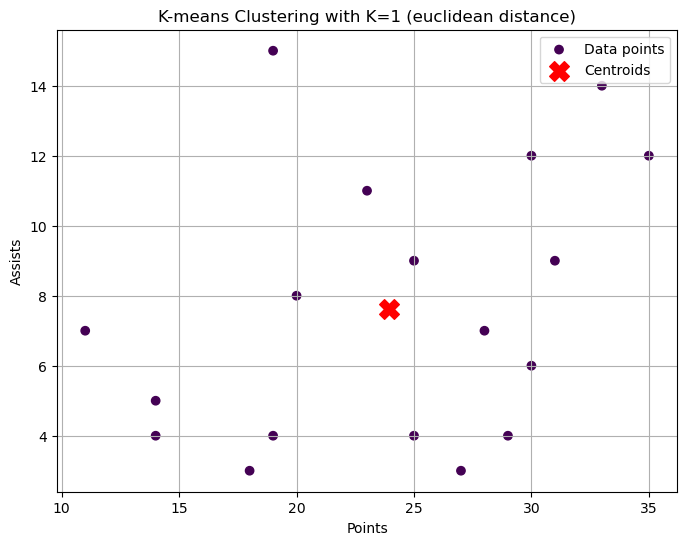

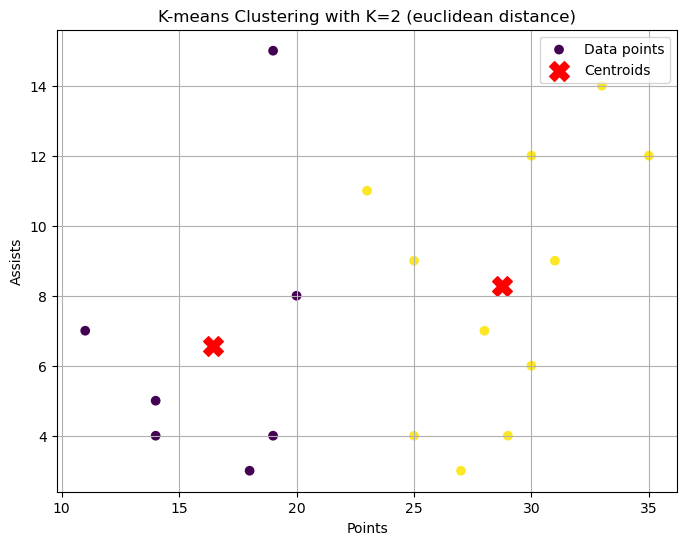

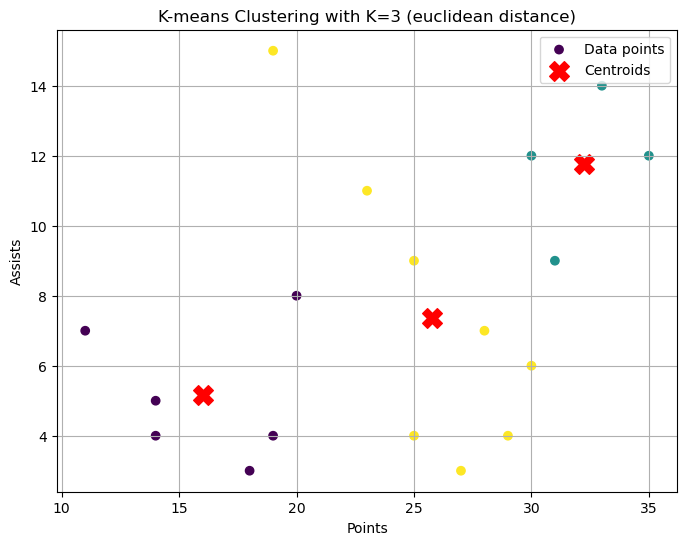

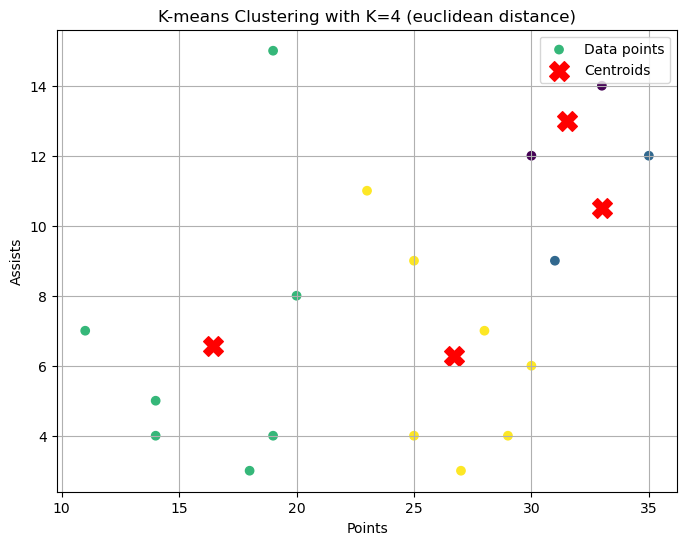

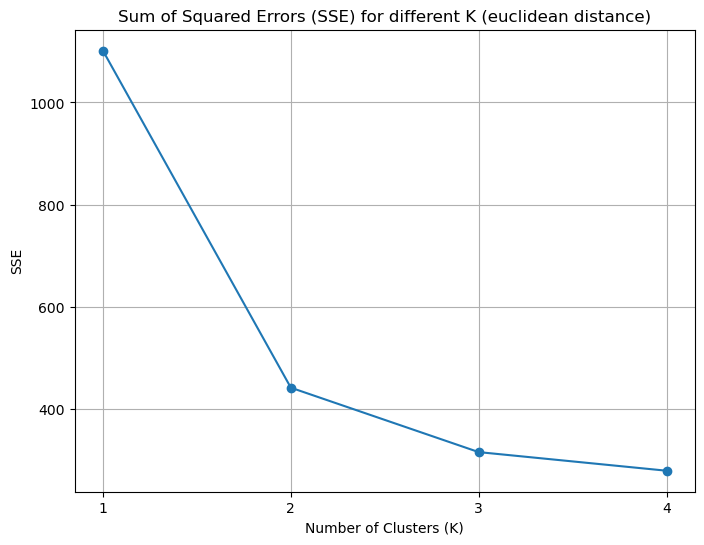

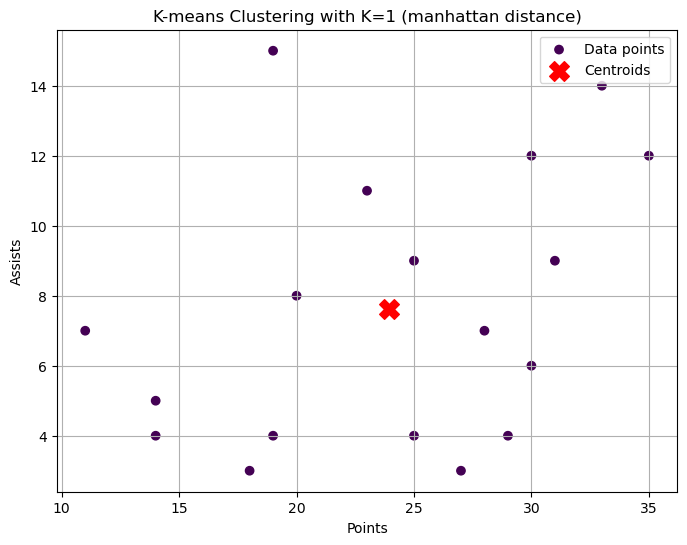

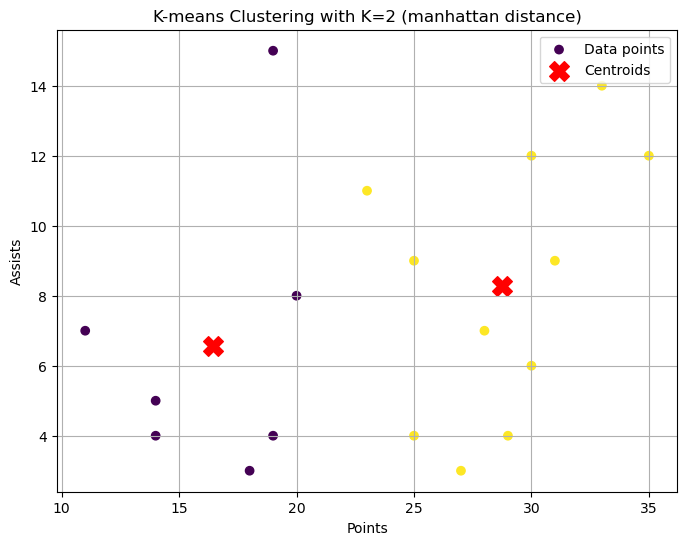

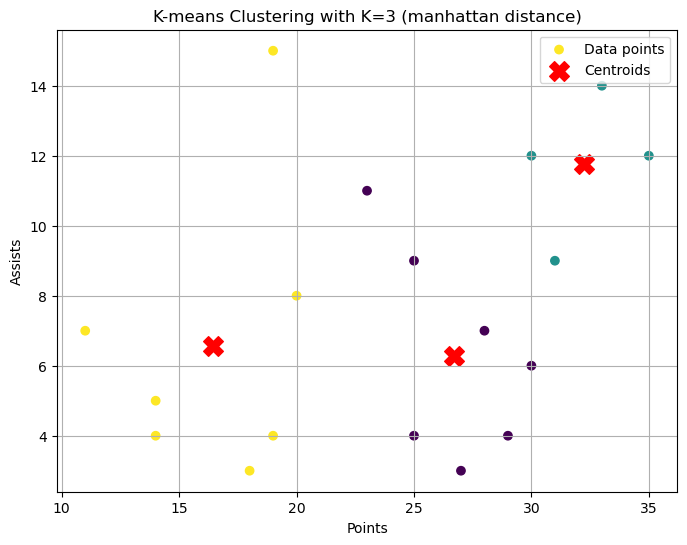

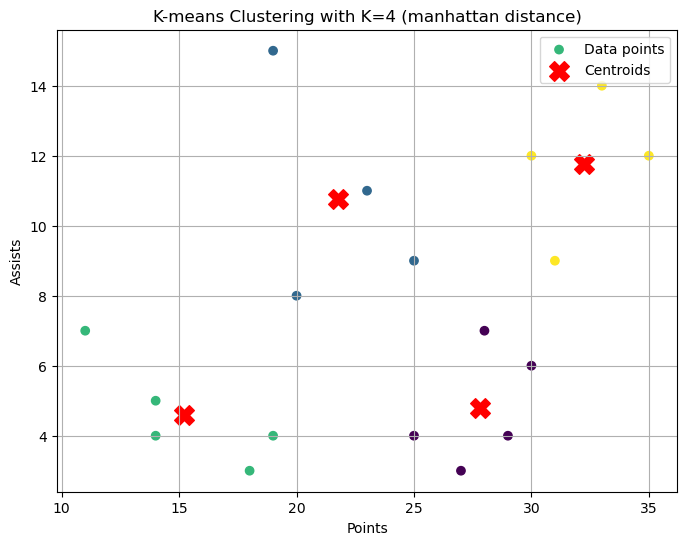

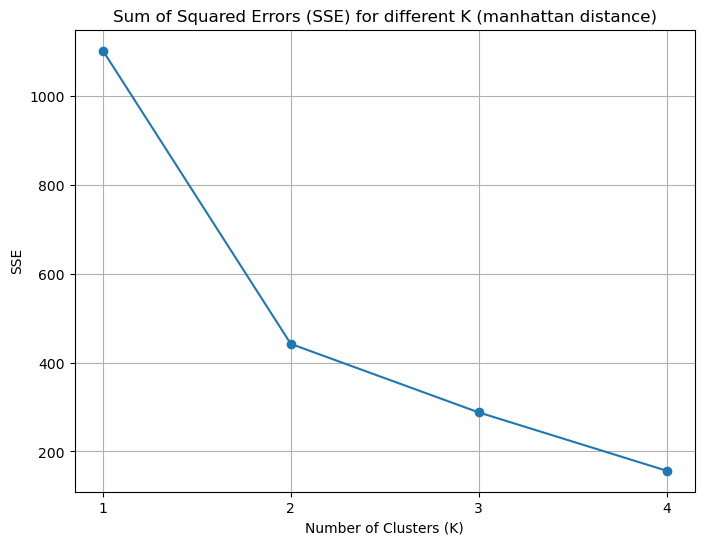

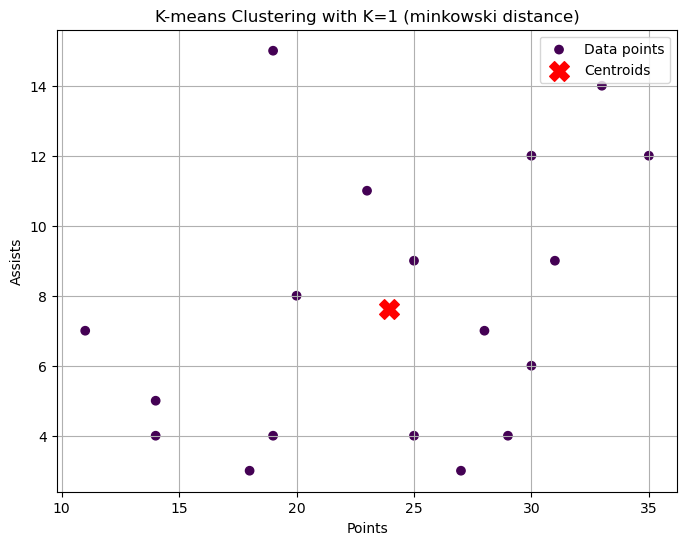

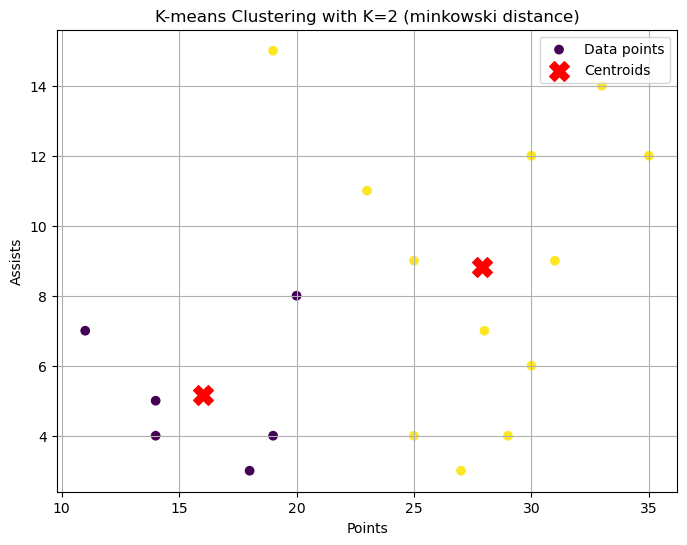

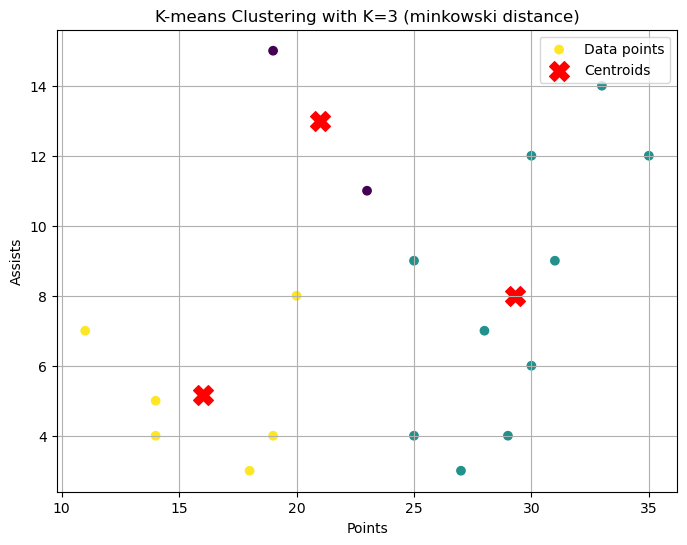

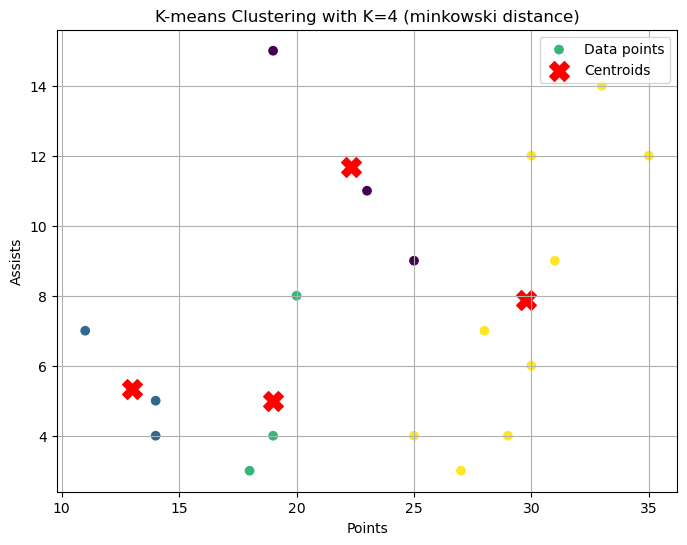

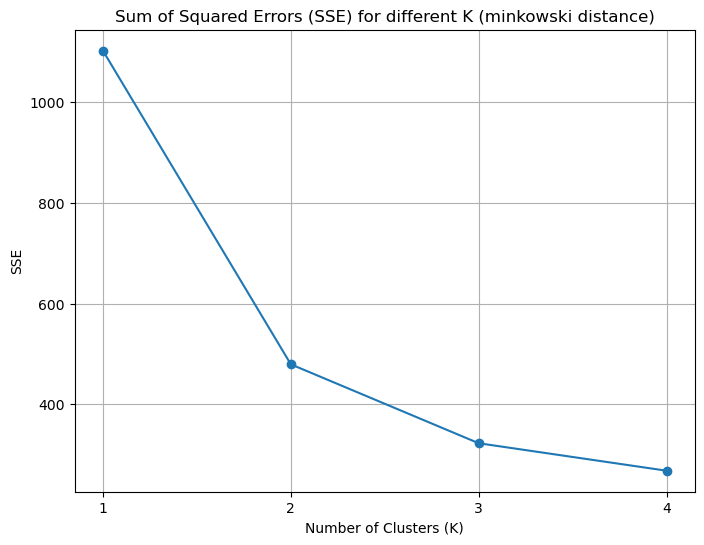

In [15]:
k_values = [1, 2, 3, 4]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
sse_results = {}

for distance_metric in distance_metrics:
    sse_results[distance_metric] = []
    
    for k in k_values:
        clusters, centroids, sse_history = kmeans(df[['points', 'assists']], k, distance_metric)
        sse_results[distance_metric].append(sse_history[-1])
        plot_clusters(df[['points', 'assists']], clusters, centroids, k, distance_metric)
    
    plot_sse(sse_results[distance_metric], distance_metric)

In [10]:
sse_df = pd.DataFrame(sse_results, index=k_values)
print("SSE Results:\n", sse_df)

SSE Results:
      euclidean    manhattan    minkowski
1  1101.222222  1101.222222  1101.222222
2   441.792208   441.792208   452.475000
3   350.366667   350.366667   370.321429
4   156.600000   198.600000   156.600000


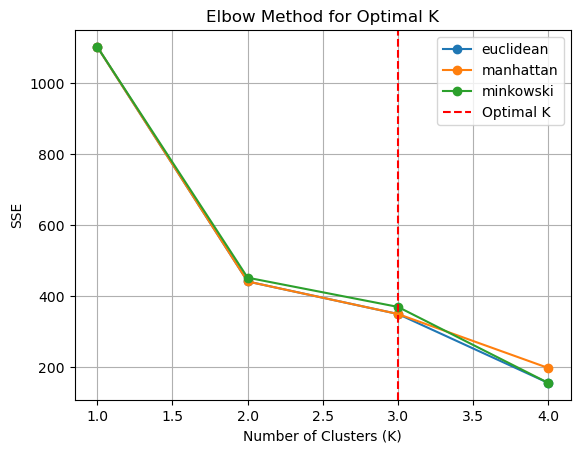

Optimal K values: {'euclidean': 3, 'manhattan': 3, 'minkowski': 3}


In [11]:
optimal_k = {}
for distance_metric in distance_metrics:
    plt.plot(range(1, len(sse_results[distance_metric]) + 1), sse_results[distance_metric], marker='o', label=distance_metric)
    optimal_k[distance_metric] = np.argmin(np.diff(np.diff(sse_results[distance_metric]))) + 2  # Finding the elbow point

plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.axvline(optimal_k[distance_metric], color='red', linestyle='--', label='Optimal K')
plt.legend()
plt.grid()
plt.show()

print("Optimal K values:", optimal_k)
